# Convolutional Neural Networks

## Project: Write an Algorithm for Landmark Classification


### Transfer learning

In the previous notebook we have trained our own CNN and we got a certain performance. Let's see how hard it is to match that performance with transfer learning.

---
## <img src="static_images/icons/noun-advance-2109145.png" alt=">" style="width:50px"/> Step 0: Setting up

The following cells make sure that your environment is setup correctly and check that your GPU is available and ready to go. You have to execute them every time you restart your notebook.

In [1]:
# Install requirements
!pip install -r requirements.txt | grep -v "already satisfied"

Defaulting to user installation because normal site-packages is not writeable


In [2]:
from src.helpers import setup_env

# If running locally, this will download dataset (make sure you have at 
# least 2 Gb of space on your hard drive)
setup_env()

GPU available
Dataset already downloaded. If you need to re-download, please delete the directory /data/DLND/C2/landmark_images
Reusing cached mean and std


---
## <img src="static_images/icons/noun-advance-2109145.png" alt=">" style="width:50px"/> Step 1: Create transfer learning architecture

Open the file `src/transfer.py` and complete the `get_model_transfer_learning` function. When you are done, execute this test:

In [4]:
!pytest -vv src/transfer.py

============================= test session starts ==============================
platform linux -- Python 3.7.6, pytest-7.1.1, pluggy-1.0.0 -- /opt/conda/bin/python3.7
cachedir: .pytest_cache
rootdir: /home/workspace
collected 1 item                                                               

src/transfer.py::test_get_model_transfer_learning PASSED                 [100%]

============================== 1 passed in 5.57s ===============================


---
## <img src="static_images/icons/noun-advance-2109145.png" alt=">" style="width:50px"/> Step 2: Train, validation and test

Let's train our transfer learning model! Let's start defining the hyperparameters:

In [3]:
batch_size = 64  # size of the minibatch for stochastic gradient descent (or Adam)
valid_size = 0.2  # fraction of the training data to reserve for validation
num_epochs = 50  # number of epochs for training
num_classes = 50  # number of classes. Do not change this
learning_rate = 0.001  # Learning rate for SGD (or Adam)
opt = 'adam'      # optimizer. 'sgd' or 'adam'
weight_decay = 0.0 # regularization. Increase this to combat overfitting

In [6]:
from src.data import get_data_loaders
from src.optimization import get_optimizer, get_loss
from src.train import optimize
from src.transfer import get_model_transfer_learning

# Get a model using get_model_transfer_learning. Use one of the names reported here:
# https://pytorch.org/vision/0.10/models.html
# For example, if you want to load ResNet 18, use "resnet18"
# NOTE: use the hyperparameters defined in the previous cell, do NOT copy/paste the
# values
model_transfer = get_model_transfer_learning(model_name="resnet18", n_classes=num_classes) 

# train the model
data_loaders = get_data_loaders(batch_size=batch_size)
optimizer = get_optimizer(
    model_transfer,
    learning_rate=learning_rate,
    optimizer=opt,
    weight_decay=weight_decay,
)
loss = get_loss()

optimize(
    data_loaders,
    model_transfer,
    optimizer,
    loss,
    n_epochs=num_epochs,
    save_path="checkpoints/model_transfer.pt",
    interactive_tracking=True
)

Reusing cached mean and std
Dataset mean: tensor([0.4638, 0.4725, 0.4687]), std: tensor([0.2699, 0.2706, 0.3018])


Validating: 100%|███████████████████████████████| 16/16 [00:06<00:00,  2.29it/s]


Epoch: 1 	Training Loss: 3.461298 	Validation Loss: 2.700544
New minimum validation loss: 2.700544. Saving model ...


Validating: 100%|███████████████████████████████| 16/16 [00:06<00:00,  2.29it/s]


Epoch: 2 	Training Loss: 2.535541 	Validation Loss: 2.050295
New minimum validation loss: 2.050295. Saving model ...


Validating: 100%|███████████████████████████████| 16/16 [00:07<00:00,  2.28it/s]


Epoch: 3 	Training Loss: 2.107650 	Validation Loss: 1.765896
New minimum validation loss: 1.765896. Saving model ...


Validating: 100%|███████████████████████████████| 16/16 [00:06<00:00,  2.31it/s]


Epoch: 4 	Training Loss: 1.873289 	Validation Loss: 1.661254
New minimum validation loss: 1.661254. Saving model ...


Validating: 100%|███████████████████████████████| 16/16 [00:06<00:00,  2.31it/s]


Epoch: 5 	Training Loss: 1.715742 	Validation Loss: 1.508166
New minimum validation loss: 1.508166. Saving model ...


Validating: 100%|███████████████████████████████| 16/16 [00:06<00:00,  2.29it/s]

Epoch: 6 	Training Loss: 1.615408 	Validation Loss: 1.502909



Validating: 100%|███████████████████████████████| 16/16 [00:06<00:00,  2.33it/s]


Epoch: 7 	Training Loss: 1.560330 	Validation Loss: 1.402454
New minimum validation loss: 1.402454. Saving model ...


Validating: 100%|███████████████████████████████| 16/16 [00:07<00:00,  2.28it/s]


Epoch: 8 	Training Loss: 1.494554 	Validation Loss: 1.384490
New minimum validation loss: 1.384490. Saving model ...


Validating: 100%|███████████████████████████████| 16/16 [00:06<00:00,  2.31it/s]


Epoch: 9 	Training Loss: 1.441312 	Validation Loss: 1.351476
New minimum validation loss: 1.351476. Saving model ...


Validating: 100%|███████████████████████████████| 16/16 [00:06<00:00,  2.30it/s]

Epoch: 10 	Training Loss: 1.380035 	Validation Loss: 1.357691



Validating: 100%|███████████████████████████████| 16/16 [00:06<00:00,  2.33it/s]

Epoch: 11 	Training Loss: 1.363245 	Validation Loss: 1.346482



Validating: 100%|███████████████████████████████| 16/16 [00:06<00:00,  2.30it/s]


Epoch: 12 	Training Loss: 1.316051 	Validation Loss: 1.280206
New minimum validation loss: 1.280206. Saving model ...


Validating: 100%|███████████████████████████████| 16/16 [00:06<00:00,  2.30it/s]

Epoch: 13 	Training Loss: 1.274556 	Validation Loss: 1.295829



Validating: 100%|███████████████████████████████| 16/16 [00:06<00:00,  2.31it/s]


Epoch: 14 	Training Loss: 1.262213 	Validation Loss: 1.260444
New minimum validation loss: 1.260444. Saving model ...


Validating: 100%|███████████████████████████████| 16/16 [00:07<00:00,  2.26it/s]

Epoch: 15 	Training Loss: 1.241807 	Validation Loss: 1.261927



Validating: 100%|███████████████████████████████| 16/16 [00:07<00:00,  2.27it/s]

Epoch: 16 	Training Loss: 1.204704 	Validation Loss: 1.269980



Validating: 100%|███████████████████████████████| 16/16 [00:06<00:00,  2.33it/s]


Epoch: 17 	Training Loss: 1.175925 	Validation Loss: 1.234823
New minimum validation loss: 1.234823. Saving model ...


Validating: 100%|███████████████████████████████| 16/16 [00:06<00:00,  2.34it/s]

Epoch: 18 	Training Loss: 1.183671 	Validation Loss: 1.239074



Validating: 100%|███████████████████████████████| 16/16 [00:06<00:00,  2.31it/s]

Epoch: 19 	Training Loss: 1.156356 	Validation Loss: 1.265028



Validating: 100%|███████████████████████████████| 16/16 [00:06<00:00,  2.31it/s]

Epoch: 20 	Training Loss: 1.140884 	Validation Loss: 1.239574



Validating: 100%|███████████████████████████████| 16/16 [00:06<00:00,  2.30it/s]

Epoch: 21 	Training Loss: 1.124479 	Validation Loss: 1.229822



Validating: 100%|███████████████████████████████| 16/16 [00:07<00:00,  2.27it/s]

Epoch: 22 	Training Loss: 1.109699 	Validation Loss: 1.230181



Validating: 100%|███████████████████████████████| 16/16 [00:06<00:00,  2.31it/s]


Epoch: 23 	Training Loss: 1.132939 	Validation Loss: 1.220500
New minimum validation loss: 1.220500. Saving model ...


Validating: 100%|███████████████████████████████| 16/16 [00:07<00:00,  2.26it/s]

Epoch: 24 	Training Loss: 1.084129 	Validation Loss: 1.236922



Validating: 100%|███████████████████████████████| 16/16 [00:07<00:00,  2.28it/s]

Epoch: 25 	Training Loss: 1.093590 	Validation Loss: 1.229067



Validating: 100%|███████████████████████████████| 16/16 [00:06<00:00,  2.31it/s]

Epoch: 26 	Training Loss: 1.070285 	Validation Loss: 1.222355



Validating: 100%|███████████████████████████████| 16/16 [00:06<00:00,  2.30it/s]

Epoch: 27 	Training Loss: 1.063776 	Validation Loss: 1.229103



Validating: 100%|███████████████████████████████| 16/16 [00:07<00:00,  2.25it/s]

Epoch: 28 	Training Loss: 1.076157 	Validation Loss: 1.222149



Validating: 100%|███████████████████████████████| 16/16 [00:06<00:00,  2.34it/s]

Epoch: 29 	Training Loss: 1.041195 	Validation Loss: 1.246145



Validating: 100%|███████████████████████████████| 16/16 [00:07<00:00,  2.27it/s]

Epoch: 30 	Training Loss: 1.060687 	Validation Loss: 1.225868



Validating: 100%|███████████████████████████████| 16/16 [00:06<00:00,  2.33it/s]

Epoch: 31 	Training Loss: 1.032610 	Validation Loss: 1.231574



Validating: 100%|███████████████████████████████| 16/16 [00:06<00:00,  2.32it/s]

Epoch: 32 	Training Loss: 1.042297 	Validation Loss: 1.209988



Validating: 100%|███████████████████████████████| 16/16 [00:07<00:00,  2.25it/s]

Epoch: 33 	Training Loss: 1.049115 	Validation Loss: 1.237573



Validating: 100%|███████████████████████████████| 16/16 [00:06<00:00,  2.32it/s]

Epoch: 34 	Training Loss: 0.988391 	Validation Loss: 1.223429



Validating: 100%|███████████████████████████████| 16/16 [00:06<00:00,  2.34it/s]


Epoch: 35 	Training Loss: 0.967280 	Validation Loss: 1.191895
New minimum validation loss: 1.191895. Saving model ...


Validating: 100%|███████████████████████████████| 16/16 [00:07<00:00,  2.27it/s]

Epoch: 36 	Training Loss: 0.958365 	Validation Loss: 1.207592



Validating: 100%|███████████████████████████████| 16/16 [00:06<00:00,  2.33it/s]

Epoch: 37 	Training Loss: 0.967589 	Validation Loss: 1.192812



Validating: 100%|███████████████████████████████| 16/16 [00:06<00:00,  2.29it/s]

Epoch: 38 	Training Loss: 0.960012 	Validation Loss: 1.190278



Validating: 100%|███████████████████████████████| 16/16 [00:06<00:00,  2.32it/s]

Epoch: 39 	Training Loss: 0.932066 	Validation Loss: 1.193716



Validating: 100%|███████████████████████████████| 16/16 [00:07<00:00,  2.25it/s]

Epoch: 40 	Training Loss: 0.949095 	Validation Loss: 1.200519



Validating: 100%|███████████████████████████████| 16/16 [00:07<00:00,  2.24it/s]

Epoch: 41 	Training Loss: 0.974181 	Validation Loss: 1.189206



Validating: 100%|███████████████████████████████| 16/16 [00:06<00:00,  2.29it/s]

Epoch: 42 	Training Loss: 0.936560 	Validation Loss: 1.196065



Validating: 100%|███████████████████████████████| 16/16 [00:07<00:00,  2.27it/s]

Epoch: 43 	Training Loss: 0.965774 	Validation Loss: 1.192917



Validating: 100%|███████████████████████████████| 16/16 [00:07<00:00,  2.26it/s]

Epoch: 44 	Training Loss: 0.944040 	Validation Loss: 1.193809



Validating: 100%|███████████████████████████████| 16/16 [00:07<00:00,  2.29it/s]

Epoch: 45 	Training Loss: 0.960209 	Validation Loss: 1.197165



Validating: 100%|███████████████████████████████| 16/16 [00:06<00:00,  2.29it/s]

Epoch: 46 	Training Loss: 0.948957 	Validation Loss: 1.203999



Validating: 100%|███████████████████████████████| 16/16 [00:06<00:00,  2.31it/s]

Epoch: 47 	Training Loss: 0.957288 	Validation Loss: 1.194762



Validating: 100%|███████████████████████████████| 16/16 [00:06<00:00,  2.32it/s]

Epoch: 48 	Training Loss: 0.946030 	Validation Loss: 1.196114



Validating: 100%|███████████████████████████████| 16/16 [00:07<00:00,  2.26it/s]

Epoch: 49 	Training Loss: 0.933878 	Validation Loss: 1.203029



Validating: 100%|███████████████████████████████| 16/16 [00:07<00:00,  2.29it/s]

Epoch: 50 	Training Loss: 0.925230 	Validation Loss: 1.200456


<img src="static_images/icons/noun-question-mark-869751.png" alt="?" style="width:25px"/> __Question:__ Outline the steps you took to get to your final CNN architecture and your reasoning at each step.  Describe why you think the architecture is suitable for the current problem.

<img src="static_images/icons/noun-answer-3361020.png" alt=">" style="width:25px"/>  __Answer:__ I decided to use ResNet18 for the base of my model, since it performs fairly well on ImageNet and is not too large of a model. Also, since ResNet18 was trained for the ImageNet task, it is a good model to use for this landmark classificaiton task, since both ImageNet and this landmark task use images of natural scenes.

Now play with the hyperparameters and see which performance you can get on the validation set. You should get at least 60% for a passing grade, but a good model choice and a good training strategy could get you up to 80% or so. Let's see how close you can get!

---
## <img src="static_images/icons/noun-advance-2109145.png" alt=">" style="width:50px"/> Step 3: Test the Model

Try out your model on the test dataset of landmark images. Use the code cell below to calculate and print the test loss and accuracy.  Ensure that your test accuracy is greater than 60% and matches more or less what you got on the validation set (otherwise you're overfitting!)

In [4]:
from src.data import get_data_loaders
from src.optimization import get_loss

data_loaders = get_data_loaders(batch_size=batch_size)
loss = get_loss()

Reusing cached mean and std
Dataset mean: tensor([0.4638, 0.4725, 0.4687]), std: tensor([0.2699, 0.2706, 0.3018])


In [14]:
!jupyter nbextension enable --py widgetsnbextension

Enabling notebook extension jupyter-js-widgets/extension...
      - Validating: OK


In [5]:
import torch
from src.train import one_epoch_test
from src.transfer import get_model_transfer_learning

model_transfer = get_model_transfer_learning("resnet18", n_classes=num_classes)
# Load saved weights
model_transfer.load_state_dict(torch.load('checkpoints/model_transfer.pt'))

one_epoch_test(data_loaders['test'], model_transfer, loss)

Testing: 100%|██████████████████████████████████| 20/20 [00:10<00:00,  2.00it/s]

Test Loss: 1.065136


Test Accuracy: 72% (904/1250)


1.0651363790035246

---
## <img src="static_images/icons/noun-advance-2109145.png" alt=">" style="width:50px"/> Step 4: Export using torchscript

Now, just like we did with our original model, we export the best fit model using torchscript so that it can be used in our application:

In [6]:
from src.predictor import Predictor
from src.helpers import compute_mean_and_std

# First let's get the class names from our data loaders
class_names = data_loaders["train"].dataset.classes

# Then let's move the model_transfer to the CPU
# (we don't need GPU for inference)
model_transfer = model_transfer.cpu()
# Let's make sure we use the right weights by loading the
# best weights we have found during training
# NOTE: remember to use map_location='cpu' so the weights
# are loaded on the CPU (and not the GPU)
model_transfer.load_state_dict(
    torch.load("checkpoints/model_transfer.pt", map_location="cpu")
)

# Let's wrap our model using the predictor class
mean, std = compute_mean_and_std()
predictor = Predictor(model_transfer, class_names, mean, std).cpu()

# Export using torch.jit.script
scripted_predictor = torch.jit.script(predictor)
scripted_predictor.save("checkpoints/transfer_exported.pt")

Reusing cached mean and std


100%|███████████████████████████████████████| 1250/1250 [01:44<00:00, 11.96it/s]


Accuracy: 0.7184


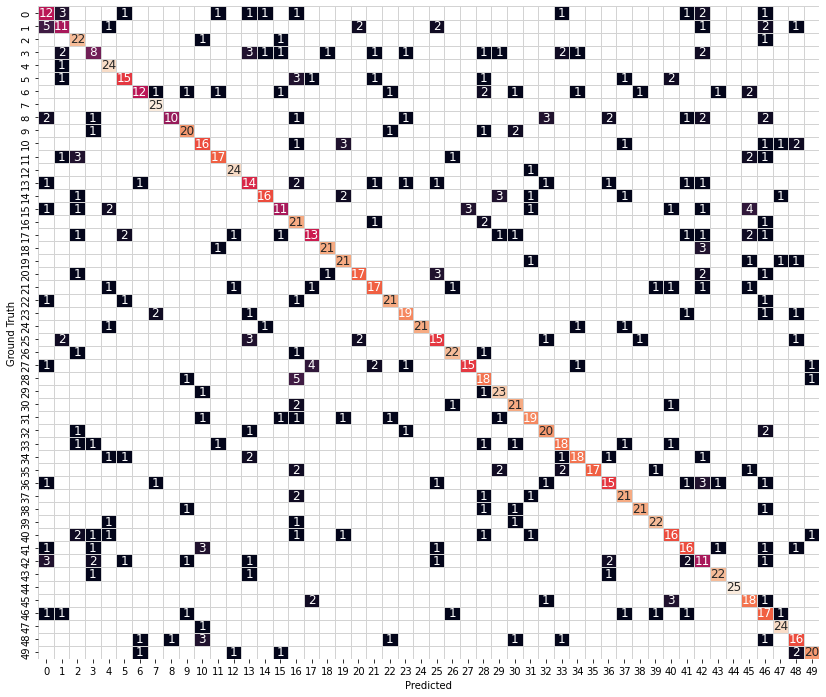

In [7]:
import torch
from src.predictor import predictor_test
from src.helpers import plot_confusion_matrix

model_reloaded = torch.jit.load("checkpoints/transfer_exported.pt")

pred, truth = predictor_test(data_loaders['test'], model_reloaded)

plot_confusion_matrix(pred, truth)